Importing the Libraries

In [1]:
import pandas as pd

In [12]:
#Data obtained from UCI ML Repository
df=pd.read_csv('winequality-red.csv')

In [13]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


It seems like the data is seperated by semicolon. Let us male it correct first!

In [14]:
df=pd.read_csv('winequality-red.csv', delimiter=";")

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Seems Good now! Let us check if it has any Nan Values

In [16]:
len(df)

1599

In [17]:
print(len(df.dropna()))

1599


The data seems good to go! No preprocessing needed!!

Let us see, the correlation of the dataframe, to find if all the columns are necessary to fit in the model or not!

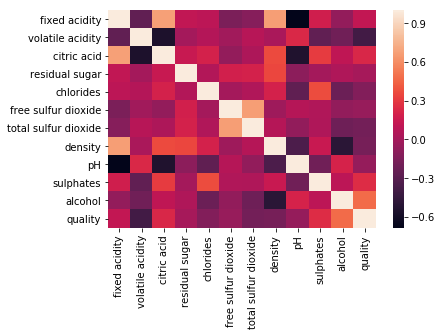

In [20]:
cor=df.corr()
import seaborn as sns
sns.heatmap(cor)

We need to look for correlation with quality, since it is the column we have to predict. It seems like all columns are highly correlated(-ve or +ve) with quality. "Volatile acidity" is slightly of concern, but since it is just one column to be removed, our model wont make much difference in the output, so we keep it.

In [22]:
y=df['quality']
x=df.drop(columns=['quality'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle=True)

In [25]:
def accuracy(y_pred,y_test):
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    print(metrics.mean_absolute_error(y_test,y_pred))
    print(metrics.mean_squared_error(y_test,y_pred))
    print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))    # using heatmap to plot accuracy
    plt.scatter(y_test,y_pred)
    plt.xlabel('predicted values')
    plt.ylabel('true values')
    plt.show()

In [26]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_features='sqrt', max_depth=80, bootstrap=True)
regressor.fit(x_train,y_train)
y_pred_randf=regressor.predict(x_test)

In [27]:
from sklearn.tree import DecisionTreeRegressor
regr=DecisionTreeRegressor(max_depth=4)
regr.fit(x_train,y_train)
y_pred_dectree=regr.predict(x_test)

In [ ]:
accuracy(y_pred_randf,y_test)
accuracy(y_pred_dectree,y_test)